In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
import matplotlib.pyplot as plt 

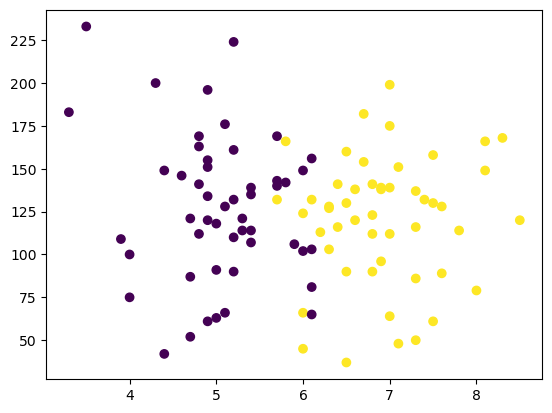

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

In [16]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
30,7.6,128.0
91,7.5,158.0
63,6.3,128.0
57,6.5,130.0
58,8.0,79.0
...,...,...
14,6.1,103.0
42,7.6,89.0
92,5.2,110.0
73,4.9,61.0


In [18]:
y_train

30    1
91    1
63    1
57    1
58    1
     ..
14    0
42    1
92    0
73    0
36    0
Name: placement, Length: 90, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 1.4112401 ,  0.08715665],
       [ 1.32542145,  0.85119219],
       [ 0.29559759,  0.08715665],
       [ 0.4672349 ,  0.13809235],
       [ 1.75451472, -1.16076808],
       [ 0.03814162,  0.62198153],
       [-0.4767703 ,  0.36730301],
       [ 0.89632817, -1.54278585],
       [ 0.12396028, -1.517318  ],
       [ 0.63887221,  0.74932079],
       [ 0.4672349 , -2.23041784],
       [ 1.84033338,  0.62198153],
       [-0.4767703 ,  0.26543161],
       [ 1.84033338,  1.054935  ],
       [-0.13349569,  0.44370657],
       [ 1.15378414, -0.21845757],
       [-0.21931434,  0.18902805],
       [ 0.98214683,  0.67291723],
       [-0.90586358, -0.11658616],
       [-0.90586358,  0.77478864],
       [ 0.89632817,  1.28414567],
       [-0.21931434,  0.46917442],
       [-1.67823147, -1.26263948],
       [ 0.03814162, -1.49185014],
       [-0.99168223,  0.41823872],
       [ 0.12396028, -1.10983237],
       [ 1.32542145, -1.6191894 ],
       [-1.07750089, -0.09111831],
       [ 0.03814162,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 0.72469086, -0.32032898],
       [ 0.63887221,  1.46242063],
       [-0.82004492, -1.5682537 ],
       [-0.21931434,  1.13133856],
       [ 1.23960279,  0.18902805],
       [-0.73422627, -1.49185014],
       [ 0.12396028,  0.18902805],
       [ 0.29559759, -0.54953964],
       [ 0.81050952,  0.36730301],
       [ 0.98214683, -1.95027147]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_test

93    1
97    1
7     0
84    0
3     1
9     0
71    1
98    1
60    1
5     1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

1.0

In [35]:
import pickle
     

In [37]:
pickle.dump(clf,open('model.pkl','wb'))

In [38]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

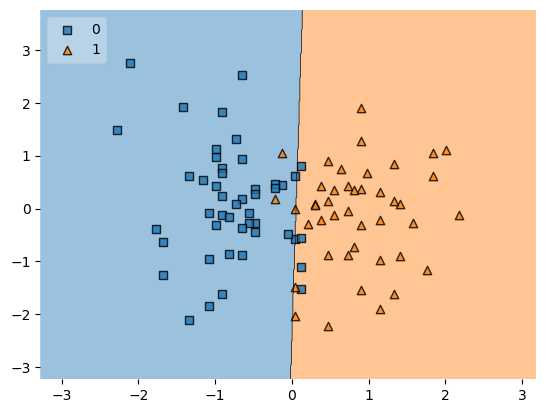

In [40]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pkl','wb'))